# Polynomial Regression

Simple linear regression is a statistical method that allows us to summarize and study relationships between two continuous (quantitative) variables:

* One variable, denoted *x*, is regarded as the independent variable.
* The other variable, denoted *y*, is regarded as the dependent variable.

Linear regression is used to predict an outcome given some input value(s). While machine learning classifiers use features to predict a **discrete** label for a given instance or example, machine learning regressors have the ability use features to predict a **continuous** outcome for a given instance or example. 

Nonetheless, regression is still a supervised learning technique and you'll still need to train your model on a set of examples with known outcomes.

The basic premise behind linear regression is to provide a model which can observe linear trends in the data; you've probably encountered linear regression at some point in the past as finding the "line of best fit".

## The model

Our machine learning model is represented by the equation of a line.
$h_\theta(x)=\theta_0+\theta_1.x + \theta_2.x^2 + ... + \theta_n . x^n$ 

In this case, we define our model as $h_\theta(x)$ where *h* represents our predicted outcome as a function of our features, *x*. Typically, the model of a line is represented by $y=mx+b$. We use *h* instead of *y* to denote that this model is a hypothesis of the true trend. In a sense, we're attempting to provide our "best guess" for finding a relationship in the data provided. $\theta_0$ and $\theta_1$ are coefficients of our linear equation (analogous to *b* and *m* in the standard line equation) and will be considered parameters of the model.

\begin{gather}h_\theta(x)=\begin{bmatrix}\theta_0 & \theta_1 & ... & \theta_n\end{bmatrix}\begin{bmatrix}1 \\ x \\ .. \\ x^n\end{bmatrix}=\theta_0+\theta_1 x + \theta_2 x^2 + ... + \theta_n x^n \end{gather}

## The cost function

In order to find the optimal line to represent our data, we need to develop a cost function which favors model parameters that lead to a better fit. This cost function will approximate the error found in our model, which we can then use to optimize our parameters, $\theta_0,\theta_1,..., \theta_n$
, by minimizing the cost function. For linear regression, we'll use the mean squared error - the average difference between our guess, $h_\theta(x^{(i)})$
, and the true value, $y^{(i)}$ - to measure performance.

$$J(\theta) = \dfrac{1}{m} \sum\limits_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2$$

## Gradient Descent

$$\theta_j = \theta_j - \eta \frac{\partial}{\partial \theta_j} J(\theta)$$

The partial derivatives can be computed as follows :

\begin{equation}
\begin{aligned}
\frac{\partial}{\partial \theta_j} J(\theta) & = \frac{\partial}{\partial \theta_j}(\dfrac{1}{m} \sum\limits_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2) \quad [1]\\
& = \frac{1}{m} \sum\limits_{i=1}^m \frac{\partial}{\partial \theta_j}( h_\theta(x^{(i)}) - y^{(i)})^2 \quad [2]\\
& = \frac{1}{m} \sum\limits_{i=1}^m 2(h_\theta(x^{(i)})-y^{(i)})\frac{\partial}{\partial \theta_j} h_\theta(x^{(i)})-y^{(i)} ) \quad [3]\\
& = \frac{2}{m} \sum\limits_{i=1}^m (h_\theta(x^{(i)})-y^{(i)}) \cdot x^j \quad [4]
\end{aligned}
\end{equation}

from line [1] to line [2], we need to apply :
* **Scalar multiple rule** : $\dfrac{\partial}{\partial x}(\alpha u) = \alpha \dfrac{\partial u}{\partial x}$
* **Sum rule** : $\dfrac{\partial}{\partial x} \sum u = \sum \dfrac{\partial u}{\partial x}$

from line [2] to line [3], we need to apply :
* **Power rule** : $\dfrac{\partial}{\partial x} u^n = nu^{n-1}\dfrac{\partial u}{\partial x}$
* **Chain rule** : $\dfrac{\partial}{\partial x} f(g(x)) = f'(g(x))g'(x)$

Finally, from line [3] to line [4], we must evaluate the partial derivatives as follows : 
$\dfrac{\partial}{\partial \theta_j}(h_\theta(x^{(i)})-y^{(i)}) = \dfrac{\partial}{\partial \theta_j}(\theta_0 + \theta_1 x + ... + \theta_n x^n- y^{(i)}) = x^j$

## Algorithm

1. Initialize the weights with zeros
2. Compute the linear combination of the input features and weights by doing : $h_\theta ' = \theta_0 + \theta_1 x + ... + \theta_n x^n$
3. Compute the cost (mean squared error) over the training set
4. Compute the partial derivatives of the cost function with respect to each parameter
5. Update the weight vector and bias

___

# Implementation

## Import the libraries

In [215]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

## Create the dataset

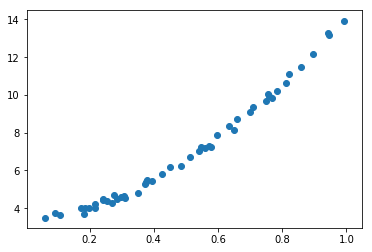

In [297]:
x1 = np.random.rand(50,1) 
y = 2*x1 + 9*x1**2 + 0.5*np.random.rand(50,1) + 3

plt.scatter(x1,y)

In [298]:
# We will approximate the function by a model of degree 2. If you want to change the degree, change the following x vector
# Ex: to approximate with a degree 3 : x = np.column_stack((x1,x1**2,x1**3))
x = np.column_stack((x1,x1**2))

In [299]:
degree = x.shape[1]

## Create the train and test sets

In [300]:
X_train, X_test, y_train, y_test = train_test_split(x, y)

In [301]:
print("X_train shape :" ,X_train.shape)
print("X_test shape :" ,X_test.shape)
print("y _train shape :" ,y_train.shape)
print("y_test shape :" ,y_test.shape)

X_train shape : (37, 2)
X_test shape : (13, 2)
y _train shape : (37, 1)
y_test shape : (13, 1)


## Create the Polynomial Regressor

In [303]:
class PolyRegression : 
    def __init__(self, degree) :
        self.degree = degree
        pass
    
    def train_gradient_descent(self, X, y, learning_rate=0.01, n_iter=100):
        """
        Trains a polynomial regression model using gradient descent
        """
        # Step 1 : initialize the weights
        X = np.column_stack((np.ones(np.shape(X)[0]),X))
        n_samples, n_features = X.shape
        self.weights = np.zeros(shape=(degree+1,1))
        costs = []
        
        for i in range(n_iter):
            # Step 2: Compute a linear combination of the input features and weights
            y_predict = np.dot(X,self.weights)
            
            # Step 3: Compute cost over training set
            cost = 1 / n_samples * np.sum((y - y_predict)**2)
            costs.append(cost)
            
            # Step 4: Compute the gradients
            dJ_dw = (2 / n_samples) * np.dot(X.T, (y_predict - y))
            
            # Step 5: Update the parameters
            self.weights = self.weights - learning_rate * dJ_dw
            
        return self.weights, costs
        
    def predict(self, X):
        """
        Predicts a linear model from the learned weights
        """
        X = np.column_stack((np.ones(np.shape(X)[0]),X))
        return np.dot(X, self.weights)
    
    def plot_function(self, X,Y):
        """
        Plot the data and the predicted function
        """
        plt.figure(figsize=(8,6))
        x = np.linspace(0,1,200)
        # Adapt x if the degre has changed
        x = np.column_stack((x,x**2))
        y = self.predict(x)
        plt.plot(x[:,0],y, c='r')
        plt.scatter(X,Y)
        plt.xlabel("First feature")
        plt.ylabel("Second feature")
        plt.show()

## Train the regressor

In [304]:
regressor = PolyRegression(degree = degree)
w_trained, costs = regressor.train_gradient_descent(X_train, y_train, learning_rate=0.25, n_iter=1000)

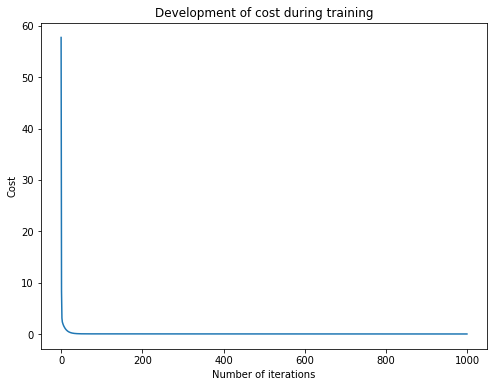

In [305]:
fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(1000), costs)
plt.title("Development of cost during training")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

## Look at the results

In [306]:
n_samples = X_train.shape[0]
n_samples_test = X_test.shape[0]

y_p_train = regressor.predict(X_train)
y_p_test = regressor.predict(X_test)

In [307]:
error_train =  (1 / n_samples) * np.sum((y_p_train - y_train) ** 2)
error_test =  (1 / n_samples_test) * np.sum((y_p_test - y_test) ** 2)

print("Error on training set:", np.round(error_train, 4))
print("Error on test set:",np.round(error_test,4))

Error on training set: 0.0244
Error on test set: 0.0528


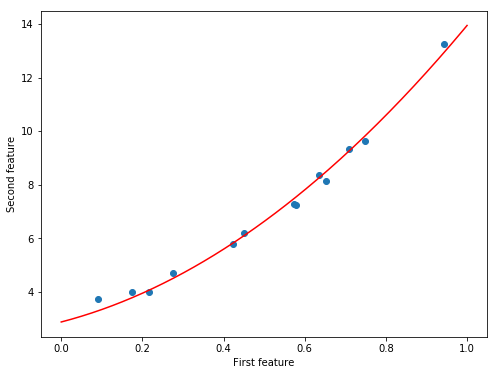

In [308]:
regressor.plot_function(X_test[:,0], y_test)

We were supposed to find the coefficient of our initial distribution :
* A coefficient of 2 for $x$
* A coefficient of 8 for $x^2$
* an intercept of 3

In [309]:
print("Coefficient of x :", w_trained[1])
print("Coefficient of x^2 :", w_trained[2])
print("Intercept :", w_trained[0])

Coefficient of x : [ 3.94495153]
Coefficient of x^2 : [ 7.12643366]
Intercept : [ 2.88249181]


The values are not exactly the same, it is understandable because we've added some noise on the training data and because we do our regression on a small training set. However, by comparing the original function and the predicted one, we can see that they are pretty close

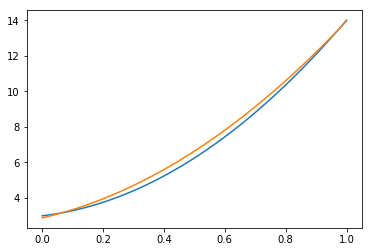

In [310]:
x1 = np.linspace(0,1,50)
y =  2*x1 + 9*x1**2 + 3
y2 = w_trained[1]*x1 + w_trained[2]*x1**2 + w_trained[0]

plt.plot(x1,y)
plt.plot(x1,y2)